# Investigate weather data resolution

When drawing charts realative to the temperature readings using this dataset obtained from the VakerVader webservice, it is noticable that particular values dominate the dataset.  

It can be seen that all reading that that occur on the hour x:00 are read to a precison of 0.1$^\circ$C, whilst all others are read to a precision of 1$^\circ$C.

This suggests that these rounded temperature measurements have been obtained from a different datasource, or using an alternative method that inadvertently truncates the precision of the reading. The reason behind this has not been established nor the implications explored.

This does not appear to be the case for the Windspeed readings 

In [8]:
# read the data file generated using the retrieved weather records from vakervader.se
data <- read.csv("./database/vackerWeather.csv", header=TRUE, sep=",", dec=".")

In [3]:
colnames(data)

[1] "X"             "timestamp"     "Temp"          "Pressure"     
 [5] "WindSpeed"     "Precipitation" "Humidity"      "WindDirection"
 [9] "Visibility"    "CloudCover"    "CloudHeight"

In [49]:
#display the first few rows of a table showing 
# the number of records for each temperature value
library(plyr)

head(count(data$Temp), 15)

,x,freq
,<dbl>,<int>
1,-1.4,2
2,-1.2,1
3,-1.1,1
4,-1.0,23
5,-0.9,1
6,-0.8,1
7,-0.7,1
8,-0.6,4
9,-0.5,1


It can be seen from the above table that the are considerably more readings for the unitary values  (x.0) than for the fractional values.

Plotting as a histogram illustrates this also.  A number of regular tall peaks are present with much fewer values between them.   

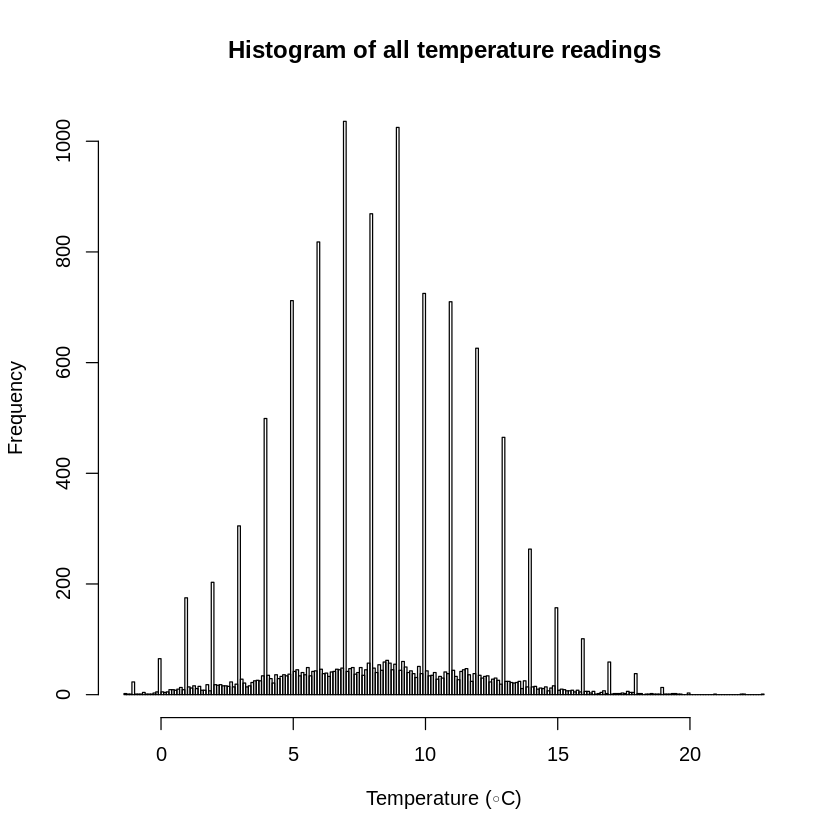

In [15]:
hist(data$Temp,200, main = "Histogram of all temperature readings", xlab = expression(paste("Temperature (",degree,"C)")), ylab = "Frequency" )

In [3]:
# create a new column of type 'R' datetime converted from the unix timestamp of each row 
data$dt <- as.POSIXct(data$timestamp, origin="1970-01-01") 

#data[(round(data$Temp))!=data$Temp]
#head(subset(data, (round(data$Temp))!=data$Temp))
nrow(data[data$Temp!=round(data$Temp),])
head(data[data$Temp!=round(data$Temp), c(1,12,3)], 12)

[1] 4229

,X,dt,Temp
,<int>,<dttm>,<dbl>
4,3,2018-12-22 02:00:00,5.2
6,5,2018-12-22 03:00:00,4.6
10,9,2018-12-22 05:00:00,5.3
15,14,2018-12-22 07:00:00,5.2
20,19,2018-12-22 09:00:00,5.6
22,21,2018-12-22 10:00:00,4.3
28,27,2018-12-22 12:00:00,5.3
30,29,2018-12-22 13:00:00,5.5
33,32,2018-12-22 14:00:00,5.6


In [6]:
head(data[, c(1,12,3)],15)

,X,dt,Temp
,<int>,<dttm>,<dbl>
1,0,2018-12-22 00:20:00,4.0
2,1,2018-12-22 00:50:00,5.0
3,2,2018-12-22 01:20:00,5.0
4,3,2018-12-22 02:00:00,5.2
5,4,2018-12-22 02:20:00,5.0
6,5,2018-12-22 03:00:00,4.6
7,6,2018-12-22 03:20:00,5.0
8,7,2018-12-22 03:50:00,5.0
9,8,2018-12-22 04:20:00,4.0


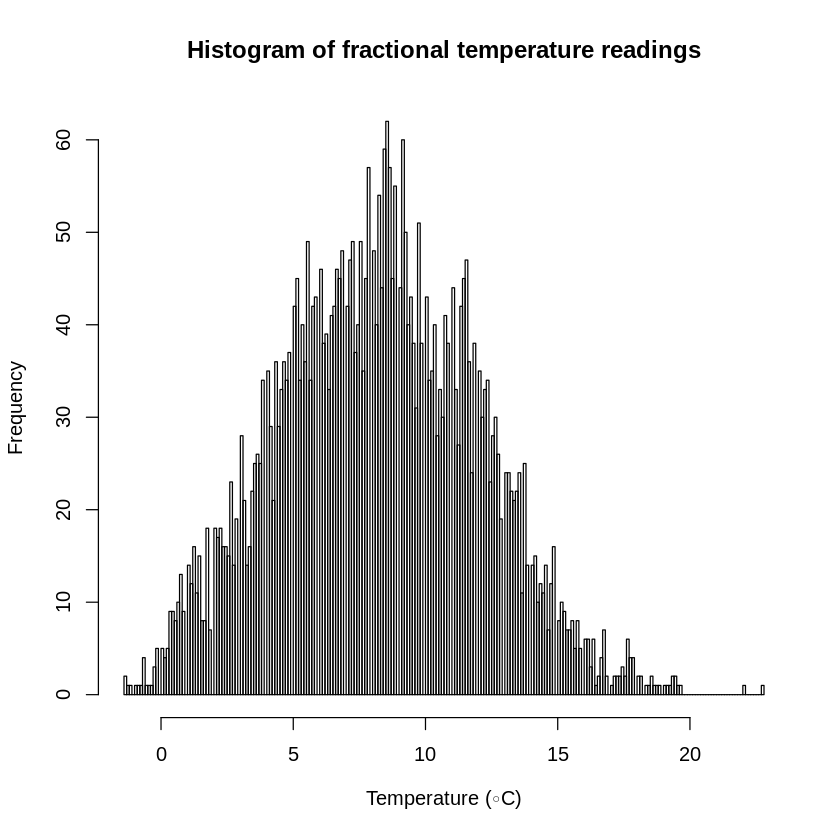

In [12]:
# histogram of fractional temperature values (x.1 - x.9)
hist(subset(data$Temp, (round(data$Temp))!=data$Temp),200, main = "Histogram of fractional temperature readings", xlab = expression(paste("Temperature (",degree,"C)")), ylab = "Frequency" )

In [51]:
# head(subset(data, (round(data$Temp))==data$Temp), c(1, 12, 3))
nrow(data[data$Temp==round(data$Temp),])
head(data[data$Temp==round(data$Temp), c(1,12,3)], 12)

[1] 8892

,X,dt,Temp
,<int>,<dttm>,<dbl>
1,0,2018-12-22 00:20:00,4
2,1,2018-12-22 00:50:00,5
3,2,2018-12-22 01:20:00,5
5,4,2018-12-22 02:20:00,5
7,6,2018-12-22 03:20:00,5
8,7,2018-12-22 03:50:00,5
9,8,2018-12-22 04:20:00,4
11,10,2018-12-22 05:20:00,5
12,11,2018-12-22 05:50:00,5


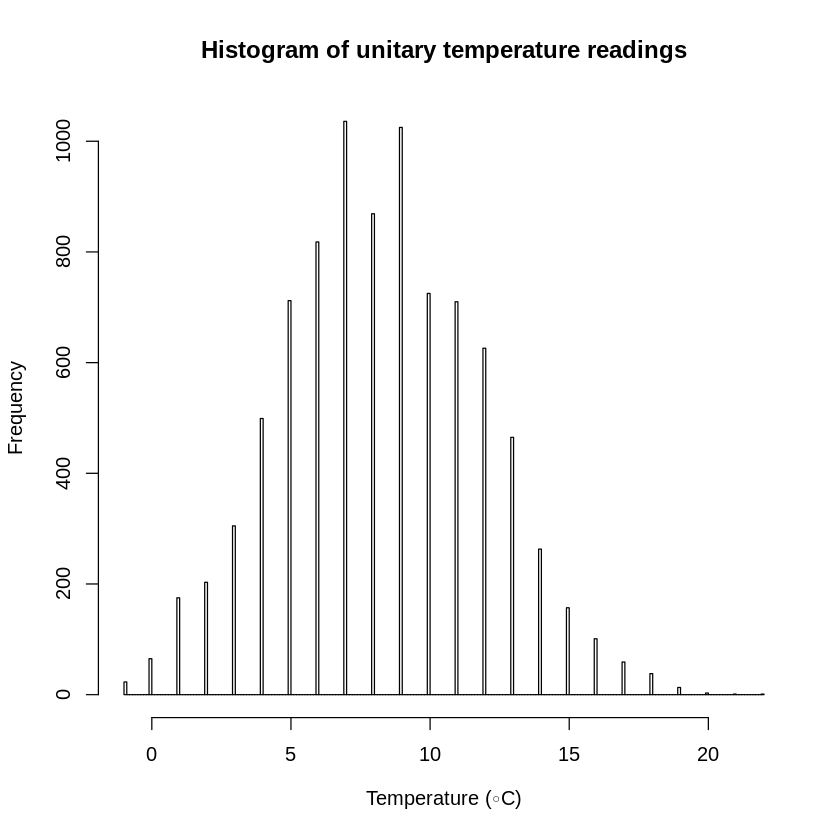

In [13]:
# histogram of unitary temperature values (x.0)
hist(subset(data$Temp, (round(data$Temp))==data$Temp),200, main = "Histogram of unitary temperature readings", xlab = expression(paste("Temperature (",degree,"C)")), ylab = "Frequency" )

The Windspeed values do not suffer from a similar problem to the Temperature values.

The histogram below shows all windspeed values generally following a skewed distribution curve.

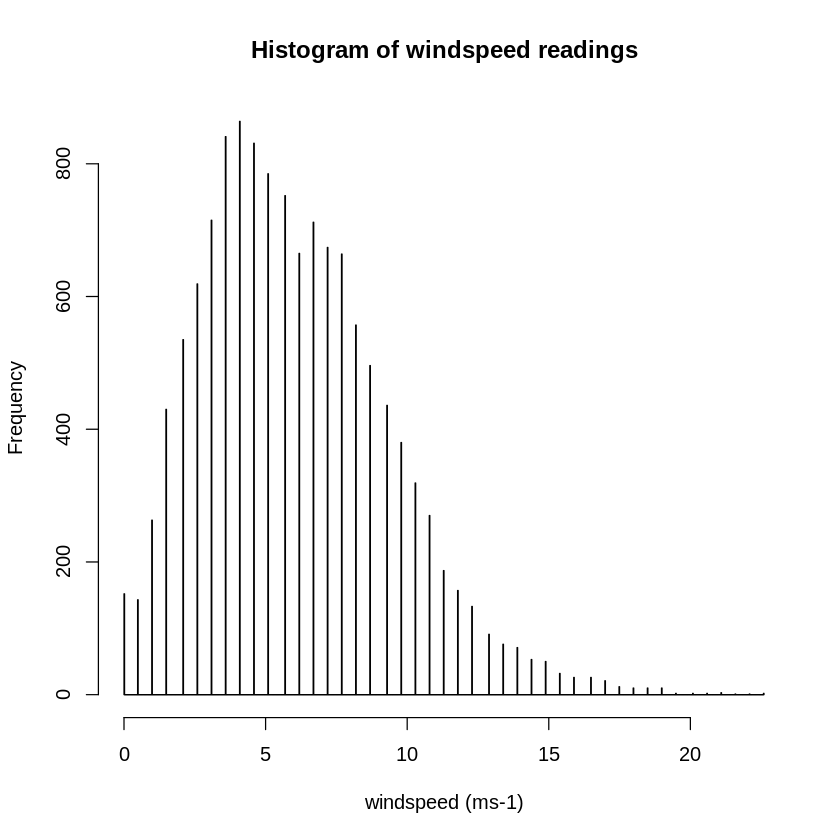

In [14]:
#histogram of windspeed values
hist(data$WindSpeed,1000, main = "Histogram of windspeed readings", xlab = "windspeed (ms-1)", ylab = "Frequency" )

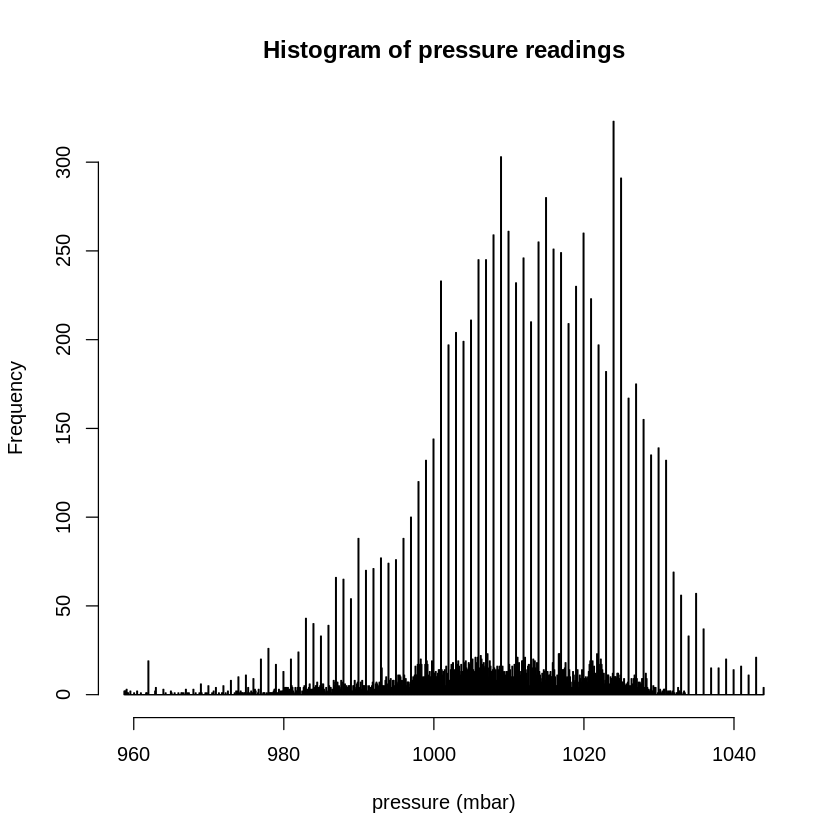

In [16]:
#histogram of pressure values
hist(data$Pressure,1000, main = "Histogram of pressure readings", xlab = "pressure (mbar)", ylab = "Frequency" )

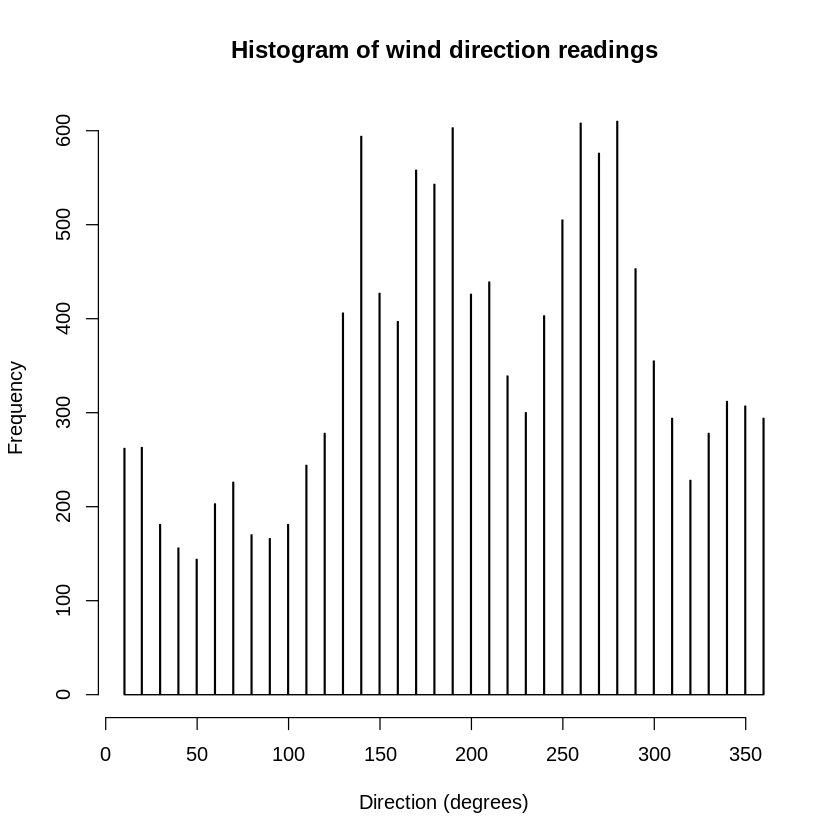

In [18]:
#histogram of wind direction values
hist(data$WindDirection,1000, main = "Histogram of wind direction readings", xlab = "Direction (degrees)", ylab = "Frequency" )